In [19]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk(r'F:\Tejaswini\6th_Sem\DL\train\images'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

F:\Tejaswini\6th_Sem\DL\train\images\1001524.jpg
F:\Tejaswini\6th_Sem\DL\train\images\1001804.jpg
F:\Tejaswini\6th_Sem\DL\train\images\1003035.jpg
F:\Tejaswini\6th_Sem\DL\train\images\1004028.jpg
F:\Tejaswini\6th_Sem\DL\train\images\1004054.jpg
F:\Tejaswini\6th_Sem\DL\train\images\1005343.jpg
F:\Tejaswini\6th_Sem\DL\train\images\1007700.jpg
F:\Tejaswini\6th_Sem\DL\train\images\1008439.jpg
F:\Tejaswini\6th_Sem\DL\train\images\1010906.jpg
F:\Tejaswini\6th_Sem\DL\train\images\1011369.jpg
F:\Tejaswini\6th_Sem\DL\train\images\1011813.jpg
F:\Tejaswini\6th_Sem\DL\train\images\1013663.jpg
F:\Tejaswini\6th_Sem\DL\train\images\1014573.jpg
F:\Tejaswini\6th_Sem\DL\train\images\1015027.jpg
F:\Tejaswini\6th_Sem\DL\train\images\1016682.jpg
F:\Tejaswini\6th_Sem\DL\train\images\1016683.jpg
F:\Tejaswini\6th_Sem\DL\train\images\1019271.jpg
F:\Tejaswini\6th_Sem\DL\train\images\1048999.jpg
F:\Tejaswini\6th_Sem\DL\train\images\1049854.jpg
F:\Tejaswini\6th_Sem\DL\train\images\1051155.jpg
F:\Tejaswini\6th_Sem

# Importing Necessary Libraries

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import warnings
import tensorflow as tf
warnings.filterwarnings('ignore')

# Data Import

In [21]:
train = pd.read_csv(r'F:\Tejaswini\6th_Sem\DL\train\train.csv')

# Data Analysis

In [22]:
train.head()

,image,category
0,2823080.jpg,1
1,2870024.jpg,1
2,2662125.jpg,2
3,2900420.jpg,3
4,2804883.jpg,2


In [23]:
train.shape

(6252, 2)

<Axes: xlabel='category', ylabel='count'>

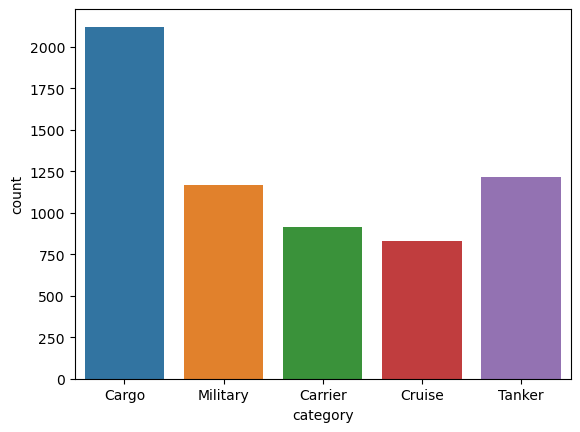

In [24]:
ship_categories = {1: 'Cargo', 2: 'Military', 3: 'Carrier', 4: 'Cruise', 5: 'Tanker'}
sns.countplot(x=train["category"].map(ship_categories))

# Data Preprocessing

**Function to load and preprocess an image**

In [28]:
path = r'F:\Tejaswini\6th_Sem\DL\train\images'
target_shape = (128, 128, 3)

def load_and_preprocess_image(image_path, target_shape):
    img = plt.imread(image_path)
    img = cv2.resize(img, (target_shape[1], target_shape[0]))  # Resize the image
    return img

**Load and preprocess images to an array of RGB colors**

In [29]:
refactor_size = 128
resized_image_list = []
all_paths = []

for i in range(len(train)):
    image_path = os.path.join(path, train["image"][i])
    img = tf.keras.utils.load_img(image_path, target_size=(refactor_size, refactor_size))
    img_vals = tf.image.convert_image_dtype(img, tf.float32)
    imgarr = tf.keras.utils.img_to_array(img_vals)
    resized_image_list.append(imgarr)
    all_paths.append(image_path)
    
resized_image_list = np.asarray(resized_image_list) #List of preprocessed images

**Plotting first 20 Images**

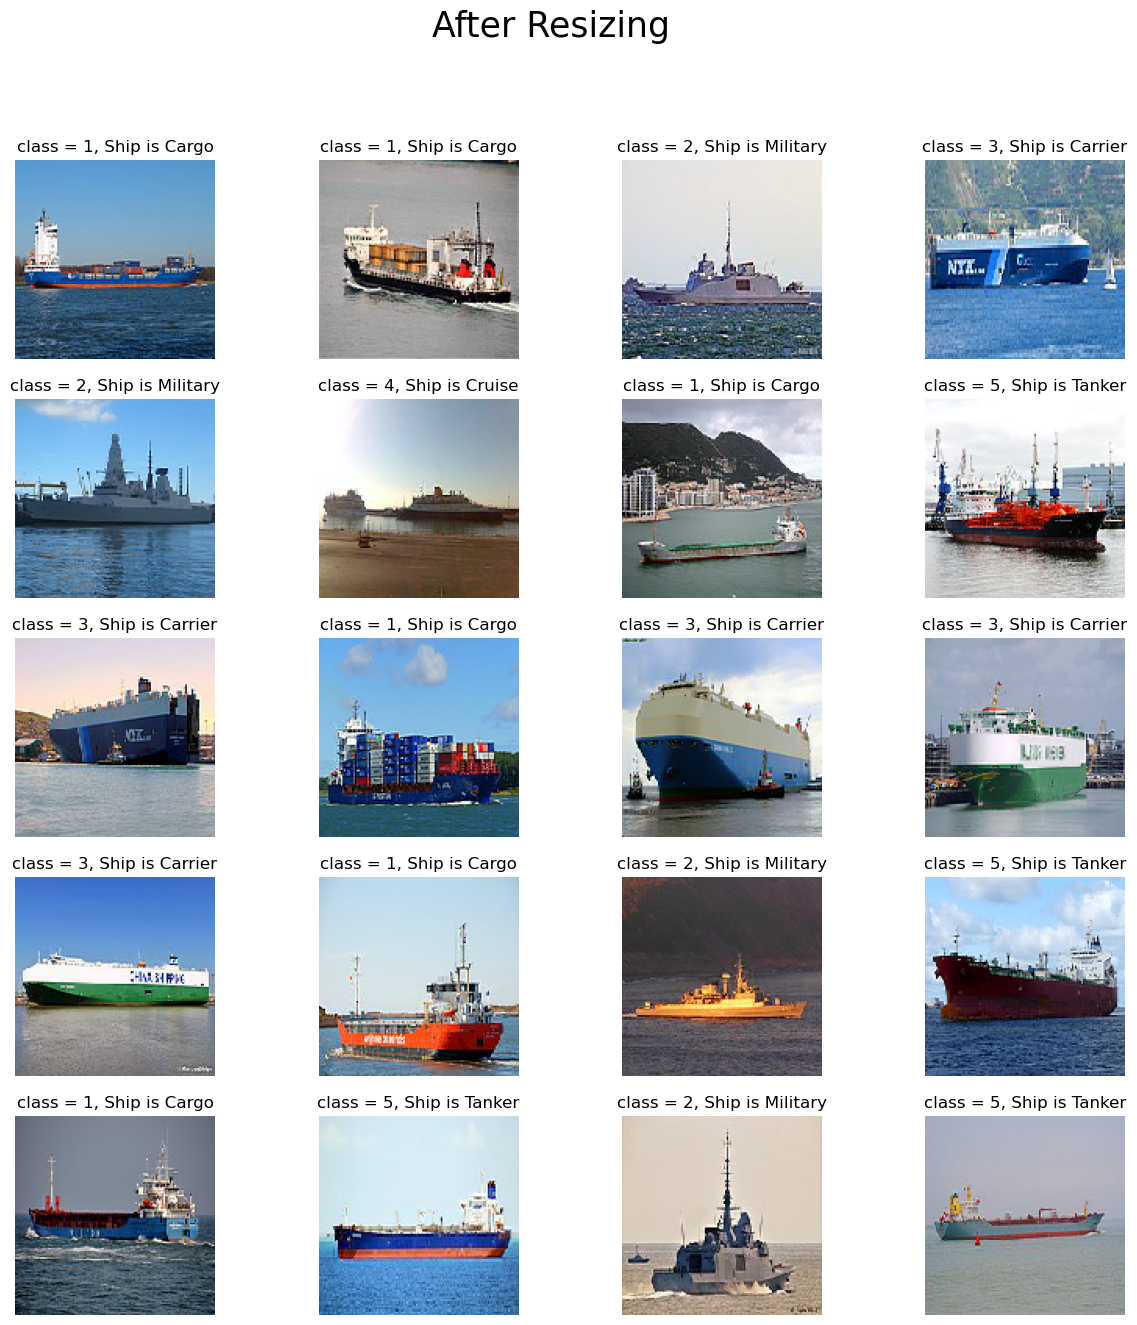

In [30]:
nrow = 5
ncol = 4
fig1 = plt.figure(figsize=(15, 15))
fig1.suptitle('After Resizing', size=25)
for i in range(20):
    plt.subplot(nrow, ncol, i + 1)
    plt.imshow(resized_image_list[i])
    plt.title('class = {x}, Ship is {y}'.format(x=train["category"][i], y=ship_categories[train["category"][i]]))
    plt.axis('Off')
    plt.grid(False)
plt.show()

In [33]:
from PIL import Image
import csv

output_dir = r'F:\Tejaswini\6th_Sem\DL\train\Preprocessed'

if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    
for i, img_arr in enumerate(resized_image_list):
    img_pil = Image.fromarray(np.uint8(img_arr*255))
    img_path = os.path.join(output_dir, f'resized_image_list_{i}.jpg')
    img_pil.save(img_path)
    print(f'Saved images {i} to {img_path}')

Saved images 0 to F:\Tejaswini\6th_Sem\DL\train\Preprocessed\resized_image_list_0.jpg
Saved images 1 to F:\Tejaswini\6th_Sem\DL\train\Preprocessed\resized_image_list_1.jpg
Saved images 2 to F:\Tejaswini\6th_Sem\DL\train\Preprocessed\resized_image_list_2.jpg
Saved images 3 to F:\Tejaswini\6th_Sem\DL\train\Preprocessed\resized_image_list_3.jpg
Saved images 4 to F:\Tejaswini\6th_Sem\DL\train\Preprocessed\resized_image_list_4.jpg
Saved images 5 to F:\Tejaswini\6th_Sem\DL\train\Preprocessed\resized_image_list_5.jpg
Saved images 6 to F:\Tejaswini\6th_Sem\DL\train\Preprocessed\resized_image_list_6.jpg
Saved images 7 to F:\Tejaswini\6th_Sem\DL\train\Preprocessed\resized_image_list_7.jpg
Saved images 8 to F:\Tejaswini\6th_Sem\DL\train\Preprocessed\resized_image_list_8.jpg
Saved images 9 to F:\Tejaswini\6th_Sem\DL\train\Preprocessed\resized_image_list_9.jpg
Saved images 10 to F:\Tejaswini\6th_Sem\DL\train\Preprocessed\resized_image_list_10.jpg
Saved images 11 to F:\Tejaswini\6th_Sem\DL\train\Pre

In [ ]:
# !pip install opencv-python